In [1]:
from IPython.display import display, Math, Latex

In [2]:
%display latex

In [3]:
ES.<rh,ph,z> = EuclideanSpace(coordinates='cylindrical')

In [4]:
ES.cylindrical_coordinates().coord_range()

rh: (0, +oo); ph: [0, 2*pi] (periodic); z: (-oo, +oo)

In [5]:
omega = var("omega")
c = var("c")
mu = var("mu")
epsilon = var("epsilon")

In [6]:
k = var("k")
m = var("m")
# kappa^2 = epsilon * mu * omega^2 / c^2 - k^2
kappa = var("kappa")

In [7]:
A_z = var("A_z")

In [8]:
B_z = var("B_z")

In [9]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [10]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

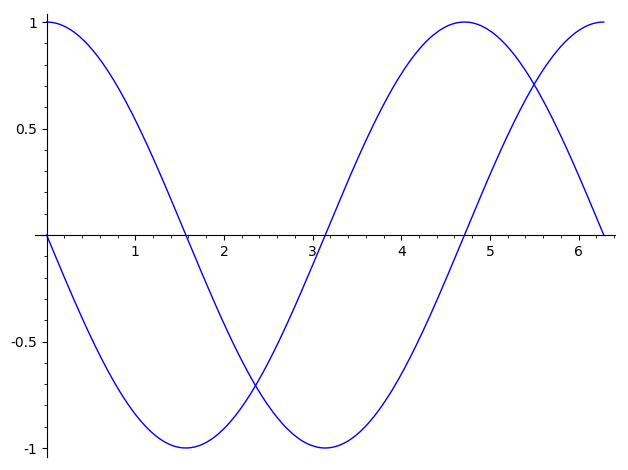

In [11]:
plot(cos(x), (x,0,2*pi)) + plot(-sin(x), (x,0,2*pi))

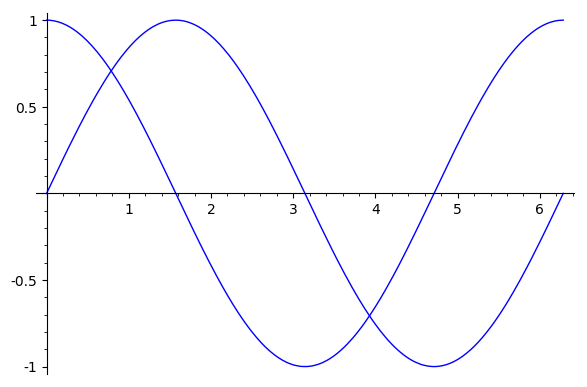

In [12]:
plot(sin(x), (x,0,2*pi)) + plot(cos(x), (x,0,2*pi))

In [13]:
H = ES.vector_field(
    I*m*omega*epsilon/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-A_z*cos(k*z) - B_z*sin(k*z)) * cos(m*ph),
           I*omega*epsilon/(kappa*c) * bessel_J_d(m,kappa*rh)*( A_z*cos(k*z) + B_z*sin(k*z)) * sin(m*ph),
                                                                                                       0,
    name='H')

In [14]:
E = ES.vector_field(
             k/kappa * bessel_J_d(m,kappa*rh)*(-A_z*sin(k*z) + B_z*cos(k*z)) * sin(m*ph),
    m*k/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z*sin(k*z) + B_z*cos(k*z)) * cos(m*ph),
                       bessel_J  (m,kappa*rh)*( A_z*cos(k*z) + B_z*sin(k*z)) * sin(m*ph),
    name='E')

In [15]:
E.display()

E = -1/2*(B_z*cos(k*z) - A_z*sin(k*z))*k*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*sin(m*ph)/kappa e_rh + (B_z*cos(k*z) - A_z*sin(k*z))*k*m*bessel_J(m, kappa*rh)*cos(m*ph)/(kappa^2*rh) e_ph + (A_z*cos(k*z) + B_z*sin(k*z))*bessel_J(m, kappa*rh)*sin(m*ph) e_z

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}\right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E}$

$rot\,rot\,\vec{E} = grad\,div\,\vec{E} - Laplasian\,\vec{E}$

$Laplasian\,\vec{E} + \mu\frac{\omega^2}{c^2}\,\epsilon_{\alpha\,\beta}\vec{E} - grad\,div\,\vec{E} = 0$

In [16]:
eq_kappa = mu * epsilon * omega^2 / c^2 - k^2 == kappa^2
eq_kappa

-k^2 + epsilon*mu*omega^2/c^2 == kappa^2

In [17]:
from sage.manifolds.operators import *

In [18]:
rot_rot_E = curl(curl(E))
rot_rot_E.display()

curl(curl(E)) = -1/2*(((B_z*k^3 + B_z*k*kappa^2)*bessel_J(m + 1, kappa*rh) - (B_z*k^3 + B_z*k*kappa^2)*bessel_J(m - 1, kappa*rh))*cos(k*z)*sin(m*ph) - ((A_z*k^3 + A_z*k*kappa^2)*bessel_J(m + 1, kappa*rh) - (A_z*k^3 + A_z*k*kappa^2)*bessel_J(m - 1, kappa*rh))*sin(m*ph)*sin(k*z))/kappa e_rh + ((B_z*k^3 + B_z*k*kappa^2)*m*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z) - (A_z*k^3 + A_z*k*kappa^2)*m*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z))/(kappa^2*rh) e_ph + 1/4*((4*(A_z*k^2 + A_z*kappa^2)*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - ((A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m + 2, kappa*rh) + (A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m - 2, kappa*rh) - 2*(A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*((A_z*k^2*kappa + A_z*kappa^3)*bessel_J(m + 1, kappa*rh) - (A_z*k^2*kappa + A_z*kappa^3)*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) + (4*(B_z*k^2 + B_z*kappa^2)*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - ((B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m + 2, kappa*rh) + (B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m - 2, kappa*rh) - 2*(B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*((B_z*k^2*kappa + B_z*kappa^3)*bessel_J(m + 1, kappa*rh) - (B_z*k^2*kappa + B_z*kappa^3)*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/(kappa^2*rh^2) e_z

In [19]:
mu_epsilon_omega2_c2_E = mu * epsilon * (omega^2 / c^2) * E
mu_epsilon_omega2_c2_E.display()

-1/2*((B_z*epsilon*k*bessel_J(m + 1, kappa*rh) - B_z*epsilon*k*bessel_J(m - 1, kappa*rh))*mu*omega^2*cos(k*z)*sin(m*ph) - (A_z*epsilon*k*bessel_J(m + 1, kappa*rh) - A_z*epsilon*k*bessel_J(m - 1, kappa*rh))*mu*omega^2*sin(m*ph)*sin(k*z))/(c^2*kappa) e_rh + (B_z*epsilon*k*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z) - A_z*epsilon*k*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z))/(c^2*kappa^2*rh) e_ph + (A_z*epsilon*mu*omega^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph) + B_z*epsilon*mu*omega^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z))/c^2 e_z

In [20]:
eq_rot_rot_E = []
for i in ES.irange():
    eq_rot_rot_E += [(rot_rot_E[i].expr() - mu_epsilon_omega2_c2_E[i].expr()).subs(solve(eq_kappa, omega^2)).full_simplify() == 0]

In [21]:
eq_rot_rot_E

[0 == 0,
 0 == 0,
 1/4*((4*(A_z*k^2 + A_z*kappa^2)*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - ((A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m + 2, kappa*rh) + (A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m - 2, kappa*rh) + 2*(A_z*k^2*kappa^2 + A_z*kappa^4)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*((A_z*k^2*kappa + A_z*kappa^3)*bessel_J(m + 1, kappa*rh) - (A_z*k^2*kappa + A_z*kappa^3)*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) + (4*(B_z*k^2 + B_z*kappa^2)*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - ((B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m + 2, kappa*rh) + (B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m - 2, kappa*rh) + 2*(B_z*k^2*kappa^2 + B_z*kappa^4)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*((B_z*k^2*kappa + B_z*kappa^3)*bessel_J(m + 1, kappa*rh) - (B_z*k^2*kappa + B_z*kappa^3)*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/(kappa^2*rh^2) == 0]

In [22]:
eq_rh = (eq_rot_rot_E[0]).full_simplify()
eq_rh

0 == 0

In [23]:
eq_ph = (eq_rot_rot_E[1]).full_simplify()
eq_ph

0 == 0

In [24]:
eq_z = (eq_rot_rot_E[2]).full_simplify()
eq_z.factor()

-1/4*(kappa^2*rh^2*bessel_J(m + 2, kappa*rh) + kappa^2*rh^2*bessel_J(m - 2, kappa*rh) + 2*kappa^2*rh^2*bessel_J(m, kappa*rh) - 2*kappa*rh*bessel_J(m + 1, kappa*rh) + 2*kappa*rh*bessel_J(m - 1, kappa*rh) - 4*m^2*bessel_J(m, kappa*rh))*(k^2 + kappa^2)*(A_z*cos(k*z) + B_z*sin(k*z))*sin(m*ph)/(kappa^2*rh^2) == 0

In [25]:
eq_z = (eq_rot_rot_E[2]*4*kappa^2*rh^2/sin(m*ph)/(kappa^2+k^2)/(A_z*cos(k*z)+B_z*sin(k*z))).full_simplify()
eq_z.factor()

-kappa^2*rh^2*bessel_J(m + 2, kappa*rh) - kappa^2*rh^2*bessel_J(m - 2, kappa*rh) - 2*kappa^2*rh^2*bessel_J(m, kappa*rh) + 2*kappa*rh*bessel_J(m + 1, kappa*rh) - 2*kappa*rh*bessel_J(m - 1, kappa*rh) + 4*m^2*bessel_J(m, kappa*rh) == 0

In [26]:
eq_z.lhs().subs(m==1).expand()

-kappa^2*rh^2*bessel_J(3, kappa*rh) - 2*kappa^2*rh^2*bessel_J(1, kappa*rh) - kappa^2*rh^2*bessel_J(-1, kappa*rh) + 2*kappa*rh*bessel_J(2, kappa*rh) - 2*kappa*rh*bessel_J(0, kappa*rh) + 4*bessel_J(1, kappa*rh)

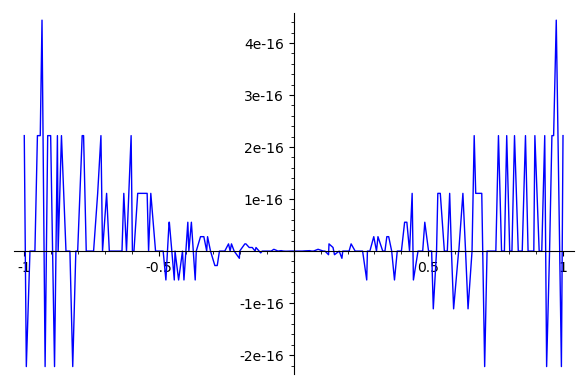

In [27]:
plot(eq_z.lhs().subs(kappa==1, m == 0), rh)

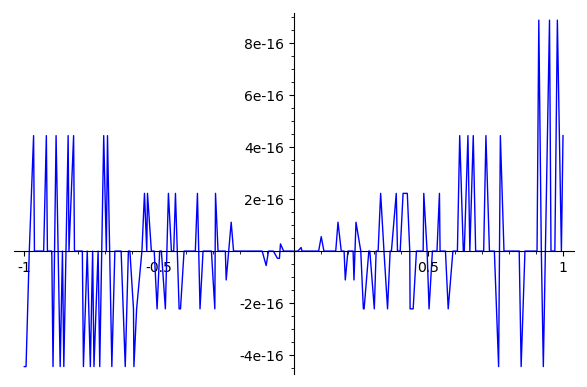

In [28]:
plot(eq_z.lhs().subs(kappa==2, m==1), rh)

In [29]:
rot_E = curl(E)
rot_E.display()

curl(E) = ((A_z*k^2 + A_z*kappa^2)*m*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z) + (B_z*k^2 + B_z*kappa^2)*m*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z))/(kappa^2*rh) e_rh + 1/2*(((A_z*k^2 + A_z*kappa^2)*bessel_J(m + 1, kappa*rh) - (A_z*k^2 + A_z*kappa^2)*bessel_J(m - 1, kappa*rh))*cos(k*z)*sin(m*ph) + ((B_z*k^2 + B_z*kappa^2)*bessel_J(m + 1, kappa*rh) - (B_z*k^2 + B_z*kappa^2)*bessel_J(m - 1, kappa*rh))*sin(m*ph)*sin(k*z))/kappa e_ph

In [30]:
mu_I_omega_c_H = mu * I * (omega / c) * H
mu_I_omega_c_H.display()

(A_z*epsilon*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z) + B_z*epsilon*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z))/(c^2*kappa^2*rh) e_rh + 1/2*((A_z*epsilon*bessel_J(m + 1, kappa*rh) - A_z*epsilon*bessel_J(m - 1, kappa*rh))*mu*omega^2*cos(k*z)*sin(m*ph) + (B_z*epsilon*bessel_J(m + 1, kappa*rh) - B_z*epsilon*bessel_J(m - 1, kappa*rh))*mu*omega^2*sin(m*ph)*sin(k*z))/(c^2*kappa) e_ph

In [31]:
eq_rot_E = []
for i in ES.irange():
    eq_rot_E += [(rot_E[i].expr() - mu_I_omega_c_H[i].expr()).subs(solve(eq_kappa, omega^2)).full_simplify() == 0]

In [32]:
eq_rot_E

[0 == 0, 0 == 0, 0 == 0]

In [33]:
grad_div_E = grad(div(E))
grad_div_E.display()

grad(div(E)) = 1/8*((16*B_z*k*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (B_z*k*kappa^3*bessel_J(m + 3, kappa*rh) + B_z*k*kappa^3*bessel_J(m + 1, kappa*rh) - B_z*k*kappa^3*bessel_J(m - 1, kappa*rh) - B_z*k*kappa^3*bessel_J(m - 3, kappa*rh))*rh^3*sin(m*ph) + 2*(B_z*k*kappa^2*bessel_J(m + 2, kappa*rh) + B_z*k*kappa^2*bessel_J(m - 2, kappa*rh) - 2*B_z*k*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) - 4*(B_z*k*kappa*m^2*bessel_J(m - 1, kappa*rh) + B_z*k*kappa*bessel_J(m - 1, kappa*rh) - (B_z*k*kappa*m^2 + B_z*k*kappa)*bessel_J(m + 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) - (16*A_z*k*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (A_z*k*kappa^3*bessel_J(m + 3, kappa*rh) + A_z*k*kappa^3*bessel_J(m + 1, kappa*rh) - A_z*k*kappa^3*bessel_J(m - 1, kappa*rh) - A_z*k*kappa^3*bessel_J(m - 3, kappa*rh))*rh^3*sin(m*ph) + 2*(A_z*k*kappa^2*bessel_J(m + 2, kappa*rh) + A_z*k*kappa^2*bessel_J(m - 2, kappa*rh) - 2*A_z*k*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) - 4*(A_z*k*kappa*m^2*bessel_J(m - 1, kappa*rh) + A_z*k*kappa*bessel_J(m - 1, kappa*rh) - (A_z*k*kappa*m^2 + A_z*k*kappa)*bessel_J(m + 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/(kappa^2*rh^3) e_rh - 1/4*((4*B_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph) - (B_z*k*kappa^2*m*bessel_J(m + 2, kappa*rh) + B_z*k*kappa^2*m*bessel_J(m - 2, kappa*rh) + 2*B_z*k*kappa^2*m*bessel_J(m, kappa*rh))*rh^2*cos(m*ph) + 2*(B_z*k*kappa*m*bessel_J(m + 1, kappa*rh) - B_z*k*kappa*m*bessel_J(m - 1, kappa*rh))*rh*cos(m*ph))*cos(k*z) - (4*A_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph) - (A_z*k*kappa^2*m*bessel_J(m + 2, kappa*rh) + A_z*k*kappa^2*m*bessel_J(m - 2, kappa*rh) + 2*A_z*k*kappa^2*m*bessel_J(m, kappa*rh))*rh^2*cos(m*ph) + 2*(A_z*k*kappa*m*bessel_J(m + 1, kappa*rh) - A_z*k*kappa*m*bessel_J(m - 1, kappa*rh))*rh*cos(m*ph))*sin(k*z))/(kappa^2*rh^3) e_ph + 1/4*((4*A_z*k^2*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (A_z*k^2*kappa^2*bessel_J(m + 2, kappa*rh) + A_z*k^2*kappa^2*bessel_J(m - 2, kappa*rh) + 2*A_z*k^2*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*(A_z*k^2*kappa*bessel_J(m + 1, kappa*rh) - A_z*k^2*kappa*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) + (4*B_z*k^2*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (B_z*k^2*kappa^2*bessel_J(m + 2, kappa*rh) + B_z*k^2*kappa^2*bessel_J(m - 2, kappa*rh) + 2*B_z*k^2*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*(B_z*k^2*kappa*bessel_J(m + 1, kappa*rh) - B_z*k^2*kappa*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/(kappa^2*rh^2) e_z

In [34]:
DE = laplacian(E)
DE.display()

Delta(E) = 1/8*((16*B_z*k*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (B_z*k*kappa^3*bessel_J(m + 3, kappa*rh) - B_z*k*kappa^3*bessel_J(m - 3, kappa*rh) - (4*B_z*k^3*kappa + 3*B_z*k*kappa^3)*bessel_J(m + 1, kappa*rh) + (4*B_z*k^3*kappa + 3*B_z*k*kappa^3)*bessel_J(m - 1, kappa*rh))*rh^3*sin(m*ph) + 2*(B_z*k*kappa^2*bessel_J(m + 2, kappa*rh) + B_z*k*kappa^2*bessel_J(m - 2, kappa*rh) - 2*B_z*k*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) - 4*(B_z*k*kappa*m^2*bessel_J(m - 1, kappa*rh) + B_z*k*kappa*bessel_J(m - 1, kappa*rh) - (B_z*k*kappa*m^2 + B_z*k*kappa)*bessel_J(m + 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) - (16*A_z*k*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (A_z*k*kappa^3*bessel_J(m + 3, kappa*rh) - A_z*k*kappa^3*bessel_J(m - 3, kappa*rh) - (4*A_z*k^3*kappa + 3*A_z*k*kappa^3)*bessel_J(m + 1, kappa*rh) + (4*A_z*k^3*kappa + 3*A_z*k*kappa^3)*bessel_J(m - 1, kappa*rh))*rh^3*sin(m*ph) + 2*(A_z*k*kappa^2*bessel_J(m + 2, kappa*rh) + A_z*k*kappa^2*bessel_J(m - 2, kappa*rh) - 2*A_z*k*kappa^2*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) - 4*(A_z*k*kappa*m^2*bessel_J(m - 1, kappa*rh) + A_z*k*kappa*bessel_J(m - 1, kappa*rh) - (A_z*k*kappa*m^2 + A_z*k*kappa)*bessel_J(m + 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/(kappa^2*rh^3) e_rh - 1/4*((4*B_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph) - (B_z*k*kappa^2*m*bessel_J(m + 2, kappa*rh) + B_z*k*kappa^2*m*bessel_J(m - 2, kappa*rh) - 2*(2*B_z*k^3 + B_z*k*kappa^2)*m*bessel_J(m, kappa*rh))*rh^2*cos(m*ph) + 2*(B_z*k*kappa*m*bessel_J(m + 1, kappa*rh) - B_z*k*kappa*m*bessel_J(m - 1, kappa*rh))*rh*cos(m*ph))*cos(k*z) - (4*A_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph) - (A_z*k*kappa^2*m*bessel_J(m + 2, kappa*rh) + A_z*k*kappa^2*m*bessel_J(m - 2, kappa*rh) - 2*(2*A_z*k^3 + A_z*k*kappa^2)*m*bessel_J(m, kappa*rh))*rh^2*cos(m*ph) + 2*(A_z*k*kappa*m*bessel_J(m + 1, kappa*rh) - A_z*k*kappa*m*bessel_J(m - 1, kappa*rh))*rh*cos(m*ph))*sin(k*z))/(kappa^2*rh^3) e_ph - 1/4*((4*A_z*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (A_z*kappa^2*bessel_J(m + 2, kappa*rh) + A_z*kappa^2*bessel_J(m - 2, kappa*rh) - 2*(2*A_z*k^2 + A_z*kappa^2)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*(A_z*kappa*bessel_J(m + 1, kappa*rh) - A_z*kappa*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*cos(k*z) + (4*B_z*m^2*bessel_J(m, kappa*rh)*sin(m*ph) - (B_z*kappa^2*bessel_J(m + 2, kappa*rh) + B_z*kappa^2*bessel_J(m - 2, kappa*rh) - 2*(2*B_z*k^2 + B_z*kappa^2)*bessel_J(m, kappa*rh))*rh^2*sin(m*ph) + 2*(B_z*kappa*bessel_J(m + 1, kappa*rh) - B_z*kappa*bessel_J(m - 1, kappa*rh))*rh*sin(m*ph))*sin(k*z))/rh^2 e_z

In [35]:
epsilon_rh_rh = var("epsilon_rh_rh")

In [36]:
epsilon_ph_ph = var("epsilon_ph_ph")

In [37]:
epsilon_z_z = var("epsilon_z_z")

In [38]:
eq_rh = (DE[1] + mu * epsilon_rh_rh * omega^2 / c^2 * E[1]).expand()

In [39]:
eq_ph = (DE[2] + mu * epsilon_ph_ph * omega^2 / c^2 * E[2]).expand()

In [40]:
eq_z = (DE[3] + mu * epsilon_z_z * omega^2 / c^2 * E[3]).expand()

In [41]:
eq_rh.display()

(rh, ph, z) |--> -1/8*B_z*k*kappa*bessel_J(m + 3, kappa*rh)*cos(k*z)*sin(m*ph) + 1/2*B_z*k^3*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph)/kappa + 3/8*B_z*k*kappa*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph) - 1/2*B_z*epsilon_rh_rh*k*mu*omega^2*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph)/(c^2*kappa) - 1/2*B_z*k^3*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph)/kappa - 3/8*B_z*k*kappa*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph) + 1/2*B_z*epsilon_rh_rh*k*mu*omega^2*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph)/(c^2*kappa) + 1/8*B_z*k*kappa*bessel_J(m - 3, kappa*rh)*cos(k*z)*sin(m*ph) + 1/8*A_z*k*kappa*bessel_J(m + 3, kappa*rh)*sin(m*ph)*sin(k*z) - 1/2*A_z*k^3*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z)/kappa - 3/8*A_z*k*kappa*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z) + 1/2*A_z*epsilon_rh_rh*k*mu*omega^2*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z)/(c^2*kappa) + 1/2*A_z*k^3*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z)/kappa + 3/8*A_z*k*kappa*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z) - 1/2*A_z*epsilon_rh_rh*k*mu*omega^2*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z)/(c^2*kappa) - 1/8*A_z*k*kappa*bessel_J(m - 3, kappa*rh)*sin(m*ph)*sin(k*z) + 1/4*B_z*k*bessel_J(m + 2, kappa*rh)*cos(k*z)*sin(m*ph)/rh + 1/2*B_z*k*m^2*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph)/(kappa*rh^2) - 1/2*B_z*k*m^2*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph)/(kappa*rh^2) + 1/4*B_z*k*bessel_J(m - 2, kappa*rh)*cos(k*z)*sin(m*ph)/rh - 1/2*B_z*k*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph)/rh - 1/4*A_z*k*bessel_J(m + 2, kappa*rh)*sin(m*ph)*sin(k*z)/rh - 1/2*A_z*k*m^2*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z)/(kappa*rh^2) + 1/2*A_z*k*m^2*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z)/(kappa*rh^2) - 1/4*A_z*k*bessel_J(m - 2, kappa*rh)*sin(m*ph)*sin(k*z)/rh + 1/2*A_z*k*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z)/rh + 1/2*B_z*k*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph)/(kappa*rh^2) - 1/2*B_z*k*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph)/(kappa*rh^2) + 2*B_z*k*m^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph)/(kappa^2*rh^3) - 1/2*A_z*k*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z)/(kappa*rh^2) + 1/2*A_z*k*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z)/(kappa*rh^2) - 2*A_z*k*m^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z)/(kappa^2*rh^3)

In [42]:
eq_ph.display()

(rh, ph, z) |--> 1/4*B_z*k*m*bessel_J(m + 2, kappa*rh)*cos(m*ph)*cos(k*z)/rh + 1/4*B_z*k*m*bessel_J(m - 2, kappa*rh)*cos(m*ph)*cos(k*z)/rh - 1/2*B_z*k*m*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z)/rh - B_z*k^3*m*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z)/(kappa^2*rh) + B_z*epsilon_ph_ph*k*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z)/(c^2*kappa^2*rh) - 1/4*A_z*k*m*bessel_J(m + 2, kappa*rh)*cos(m*ph)*sin(k*z)/rh - 1/4*A_z*k*m*bessel_J(m - 2, kappa*rh)*cos(m*ph)*sin(k*z)/rh + 1/2*A_z*k*m*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z)/rh + A_z*k^3*m*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z)/(kappa^2*rh) - A_z*epsilon_ph_ph*k*m*mu*omega^2*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z)/(c^2*kappa^2*rh) - 1/2*B_z*k*m*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos(k*z)/(kappa*rh^2) + 1/2*B_z*k*m*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos(k*z)/(kappa*rh^2) - B_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph)*cos(k*z)/(kappa^2*rh^3) + 1/2*A_z*k*m*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin(k*z)/(kappa*rh^2) - 1/2*A_z*k*m*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin(k*z)/(kappa*rh^2) + A_z*k*m^3*bessel_J(m, kappa*rh)*cos(m*ph)*sin(k*z)/(kappa^2*rh^3)

In [43]:
eq_z.display()

(rh, ph, z) |--> 1/4*A_z*kappa^2*bessel_J(m + 2, kappa*rh)*cos(k*z)*sin(m*ph) + 1/4*A_z*kappa^2*bessel_J(m - 2, kappa*rh)*cos(k*z)*sin(m*ph) - A_z*k^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph) - 1/2*A_z*kappa^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph) + A_z*epsilon_z_z*mu*omega^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph)/c^2 + 1/4*B_z*kappa^2*bessel_J(m + 2, kappa*rh)*sin(m*ph)*sin(k*z) + 1/4*B_z*kappa^2*bessel_J(m - 2, kappa*rh)*sin(m*ph)*sin(k*z) - B_z*k^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z) - 1/2*B_z*kappa^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z) + B_z*epsilon_z_z*mu*omega^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z)/c^2 - 1/2*A_z*kappa*bessel_J(m + 1, kappa*rh)*cos(k*z)*sin(m*ph)/rh + 1/2*A_z*kappa*bessel_J(m - 1, kappa*rh)*cos(k*z)*sin(m*ph)/rh - A_z*m^2*bessel_J(m, kappa*rh)*cos(k*z)*sin(m*ph)/rh^2 - 1/2*B_z*kappa*bessel_J(m + 1, kappa*rh)*sin(m*ph)*sin(k*z)/rh + 1/2*B_z*kappa*bessel_J(m - 1, kappa*rh)*sin(m*ph)*sin(k*z)/rh - B_z*m^2*bessel_J(m, kappa*rh)*sin(m*ph)*sin(k*z)/rh^2

In [44]:
find_root(bessel_J(0,x)==0,0,2*pi)

5.520078110286276

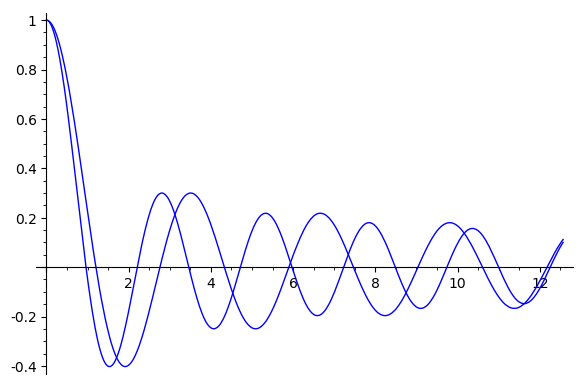

In [45]:
p = sage.plot.graphics.Graphics()
for i in range(2 ):
    p += plot(bessel_J(0, (2+0.5*i)*x),(x,0,4*pi))
p.show()

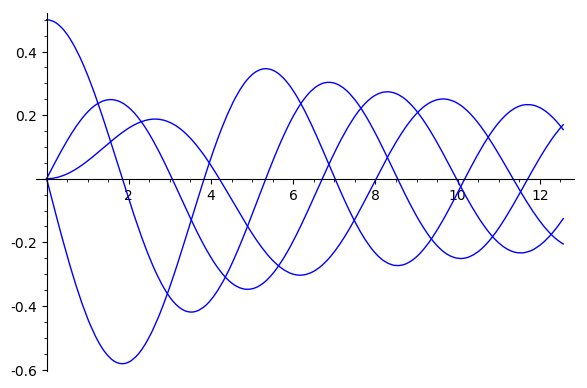

In [46]:
p = sage.plot.graphics.Graphics()
for i in range(4):
    p += plot(bessel_J(i, x).diff(x),(x,0,4*pi))
p.show()

In [47]:
display(Math(latex(bessel_J(1, x).diff(x))))

<IPython.core.display.Math object>

In [48]:
bessel_J(0, x).diff(x)

-1/2*bessel_J(1, x) + 1/2*bessel_J(-1, x)

In [49]:
bessel_J(m, x).diff(x)

-1/2*bessel_J(m + 1, x) + 1/2*bessel_J(m - 1, x)

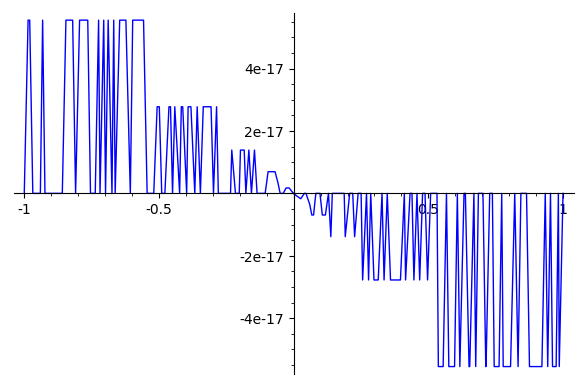

In [50]:
plot(bessel_J(1, x)+bessel_J(-1, x), x)

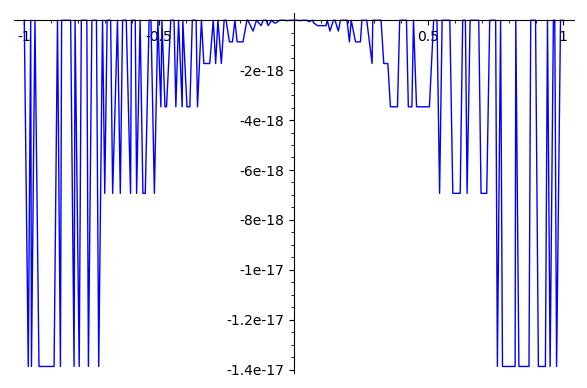

In [51]:
plot(bessel_J(2, x)-bessel_J(-2, x), x)